In [1]:
!pip install imblearn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.1 MB 2.2 MB/s eta 0:00:05
   ---- ----------------------------------- 1.3/11.1 MB 2.6 MB/s eta 0:00:04
   ------ --------------------------------- 1.8/11.1 MB 2.5 MB/s eta 0:00:04
   --------- ------------------------------ 2.6/11.1 MB 2.6 MB/s eta 0:00:04
   ----------- ---------------------------- 3.1/11.1 MB 2.7 MB/s eta 0:00:03
   ------------ --------------------------- 3.4/11.1 MB 2.6 MB/s eta 0:00:03
   -------------- ------------------------- 3.9/11.1 MB 2.5 MB/s eta 0:00:03
   ---------------- ----------------------- 4.5/11.1 MB 2.5 MB/s eta 0:00:03
   ----------------- ---------------------- 5.0/11.1 MB 2.5 MB/s eta 0:00:03
   ------------------ --------------------- 5.2/11.1 MB 2.4 MB/s eta 0:00:03
   -------------------- ------------------- 5.8/11.1 MB 2.4 MB/s eta 0:00:03
   ----------

In [2]:
# Step 1: Import libraries
import os
import glob
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_path = "fdata\data" 


categories = ["Balance Sheets", "Cash Flow", "Income Statement", "Notes", "Others"]

In [8]:
#Extract text from HTML files

texts = []
labels = []

for category in categories:
    folder_path = os.path.join(data_path, category)
    for filepath in glob.glob(os.path.join(folder_path, "*.html")):
        with open(filepath, "r", encoding="utf-8") as f:
            soup = BeautifulSoup(f, "html.parser")
            text = soup.get_text(separator=" ", strip=True)
            texts.append(text)
            labels.append(category)

df = pd.DataFrame({"text": texts, "label": labels})


In [9]:
df.shape

(2525, 2)

In [11]:
df["label"].value_counts()

label
Others              1224
Notes                690
Income Statement     305
Balance Sheets       270
Cash Flow             36
Name: count, dtype: int64

In [12]:
# Text Preprocessing 
import re
def preprocess_text(text):
    text = text.lower() 
    text = re.sub(r'\s+', ' ', text)  # replace multiple spaces/newlines with single space
    text = re.sub(r'[^a-z0-9\s]', '', text)  # remove special chars except numbers and letters
    return text



In [13]:
df['text'] = df['text'].apply(preprocess_text)

In [18]:
df['label']

0       Balance Sheets
1       Balance Sheets
2       Balance Sheets
3       Balance Sheets
4       Balance Sheets
             ...      
2520            Others
2521            Others
2522            Others
2523            Others
2524            Others
Name: label, Length: 2525, dtype: object

In [19]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split( df['text'], df['label'], test_size=0.2, stratify=df['label'], random_state=42)



In [20]:
X_train.shape

(2020,)

In [21]:
X_test.shape

(505,)

In [22]:
y_train.shape

(2020,)

In [23]:
y_test.shape

(505,)

In [26]:
X_train[0]

'7 in lacs 7 in lacs 1 standalone consolidated sr no particulars as at 31st march 2018 as at 31st march 2017 as at 31st march 2018 as at 31st march 2017 a assets 1 noncurrent assets a property plant and equipment 1072396 928123 1072396 928123 b capital work in progress 60746  60746  c intangible assets 1744 1871 1744 1871 d financial assets i noncurrent investments 15000 15000 6342 2469 ii loans     iii other financial assets 19766 13062 19766 13062 e other noncurrent assets     total noncurrent assets a 1169652 958056 1160994 945525 2 current assets a inventories 800202 1392510 800202 1392510 b financial assets i trade receivables 1854175 1367101 1854175 1367101 ii cash and cash equivalents 288382 17711 288382 17711 iii bank balances other than ii above 35708 153845 35708 153845 ivj loans 312 179 312 179 v other financial assets 22019 103536 22019 103536 c other current assets 68459 216981 68459 216981 total current assets b 3069257 3251863 3069257 3251863  total assets a b 4238909 42

In [27]:
#Vectorization with TF-IDF


vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [28]:
#Handle class imbalance with SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)



In [ ]:
print(pd.Series(y_train_resampled).value_counts())

label
Notes               979
Others              979
Balance Sheets      979
Income Statement    979
Cash Flow           979
Name: count, dtype: int64


In [38]:
#Logistic Regression
LR = LogisticRegression(max_iter=1000, random_state=42)
LR.fit(X_train_resampled, y_train_resampled)

LR.score(X_train_resampled, y_train_resampled)



0.992849846782431

In [49]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train_resampled, y_train_resampled)

DT.score(X_test_tfidf, y_test)


0.8950495049504951

In [47]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100)
RF.fit(X_train_resampled, y_train_resampled)

RF.score(X_test_tfidf, y_test)

0.9425742574257425

In [48]:
#Boosinting

from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier()
GB.fit(X_train_resampled, y_train_resampled)

GB.score(X_test_tfidf, y_test)



0.9247524752475248

In [52]:
!pip install xgboost


   ---------------------------------------- 0.0/149.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/149.9 MB 4.8 MB/s eta 0:00:32
   ---------------------------------------- 1.6/149.9 MB 4.4 MB/s eta 0:00:34
   ---------------------------------------- 1.8/149.9 MB 3.4 MB/s eta 0:00:45
    --------------------------------------- 2.1/149.9 MB 2.4 MB/s eta 0:01:01
    --------------------------------------- 2.1/149.9 MB 2.4 MB/s eta 0:01:01
    --------------------------------------- 2.4/149.9 MB 2.0 MB/s eta 0:01:14
    --------------------------------------- 2.6/149.9 MB 1.9 MB/s eta 0:01:19
    --------------------------------------- 3.1/149.9 MB 1.9 MB/s eta 0:01:19
   - -------------------------------------- 4.2/149.9 MB 2.1 MB/s eta 0:01:09
   - -------------------------------------- 5.2/149.9 MB 2.4 MB/s eta 0:01:00
   - -------------------------------------- 6.0/149.9 MB 2.6 MB/s eta 0:00:56
   - -------------------------------------- 7.1/149.9 MB 2.7 MB/s eta 0

In [57]:
#MLP

from sklearn.neural_network import MLPClassifier

MLP = MLPClassifier(hidden_layer_sizes=(7,), max_iter=1000)
MLP.fit(X_train_resampled, y_train_resampled)

MLP.score(X_test_tfidf, y_test)

0.9544554455445544

0.9465346534653465

In [ ]:
y_pred = LR.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

  Balance Sheets       0.93      1.00      0.96        54
       Cash Flow       0.86      0.86      0.86         7
Income Statement       0.97      0.95      0.96        61
           Notes       0.93      0.92      0.93       138
          Others       0.95      0.95      0.95       245

        accuracy                           0.95       505
       macro avg       0.93      0.94      0.93       505
    weighted avg       0.95      0.95      0.95       505



In [42]:
RF_pred = RF.predict(X_test_tfidf)

print(classification_report(y_test, RF_pred))

                  precision    recall  f1-score   support

  Balance Sheets       0.95      0.96      0.95        54
       Cash Flow       1.00      0.86      0.92         7
Income Statement       1.00      0.89      0.94        61
           Notes       0.92      0.94      0.93       138
          Others       0.94      0.96      0.95       245

        accuracy                           0.94       505
       macro avg       0.96      0.92      0.94       505
    weighted avg       0.94      0.94      0.94       505



In [44]:
DT_pred = DT.predict(X_test_tfidf)

print(classification_report(y_test, DT_pred))

                  precision    recall  f1-score   support

  Balance Sheets       0.93      0.93      0.93        54
       Cash Flow       1.00      0.71      0.83         7
Income Statement       0.93      0.92      0.93        61
           Notes       0.85      0.88      0.87       138
          Others       0.91      0.90      0.91       245

        accuracy                           0.90       505
       macro avg       0.92      0.87      0.89       505
    weighted avg       0.90      0.90      0.90       505



In [ ]:
MLP_pred = MLP.predict(X_test_tfidf)
print(classification_report(y_test, MLP_pred))

y_pred = LR.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

  Balance Sheets       0.96      1.00      0.98        54
       Cash Flow       1.00      0.86      0.92         7
Income Statement       0.92      0.97      0.94        61
           Notes       0.96      0.93      0.95       138
          Others       0.96      0.96      0.96       245

        accuracy                           0.95       505
       macro avg       0.96      0.94      0.95       505
    weighted avg       0.95      0.95      0.95       505

                  precision    recall  f1-score   support

  Balance Sheets       0.93      1.00      0.96        54
       Cash Flow       0.86      0.86      0.86         7
Income Statement       0.97      0.95      0.96        61
           Notes       0.93      0.92      0.93       138
          Others       0.95      0.95      0.95       245

        accuracy                           0.95       505
       macro avg       0.93      0.94      0.93       505
    weigh

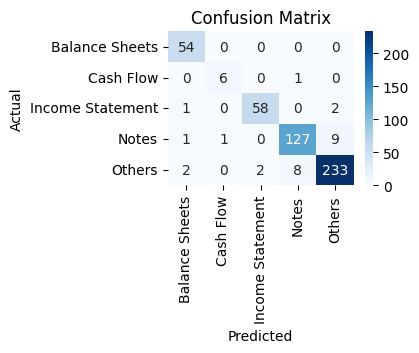

In [62]:
# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred, labels=LR.classes_)
plt.figure(figsize=(3,2))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=LR.classes_, yticklabels=LR.classes_, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()




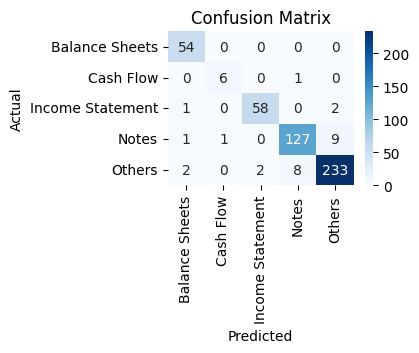

In [68]:
mml = confusion_matrix(y_test, y_pred, labels=MLP.classes_)
plt.figure(figsize=(3,2))
sns.heatmap(dm, annot=True, fmt='d', xticklabels=MLP.classes_, yticklabels=MLP.classes_, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [108]:
# Saving Model
joblib.dump(MLP, "MODELS/ROG_CLASSIFIER.pkl")
joblib.dump(vectorizer, "MODELS/ROG_tfidf_vectorizer.pkl")

print("Model and vectorizer saved.")

Model and vectorizer saved.


In [129]:
import pdfplumber

with pdfplumber.open("RE10.pdf") as pdf:
    first_page = pdf.pages[163]
    doc7 = first_page.extract_text()
    print(doc7)

158 Think Growth. Think Transformation. Think Reliance.
Reliance Industries Limited
Consolidated Cash Flow Statement for the year 2009-10
(Rs. in crore)
2009-10 2008-09
A: CASH FLOW FROM OPERATING ACTIVITIES:
Net Profit before tax as per Profit and Loss Account 28,679.86 17,869.14
Adjusted for:
Miscellaneous Expenditure written off 2.09 1.02
Share in Income of Associates (10.77) 127.14
Net Prior Year Adjustments 1.35 2.64
Diminution in value of Investments 8.30 3.44
Investment written off (net) 245.33 -
Impairment of Assets 17.70 -
Loss on Sale / Discarding of Assets (net) 33.34 31.40
Depreciation 14,000.62 7,712.58
Transferred from Revaluation Reserve (2,991.80) (1,987.14)
Transferred from Capital Reserve (63.02) (74.46)
Effect of Exchange Rate Change (1,799.43) 474.49
Effect of De-subsidiarisation 16.53 (43.09)
Profit on Sale of Investments (net) (296.18) (425.08)
Exceptional Item (8,605.57) -
Dividend Income (8.30) (44.41)
Interest / Other Income (1,716.18) (1,456.07)
Interest and F

In [130]:
import re

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text


sample_text_processed = preprocess_text(doc7)

sample_vec = vectorizer.transform([sample_text_processed])

sample_pred = MLP.predict(sample_vec)

print(f"Predicted Document Category: {sample_pred[0]}")


Predicted Document Category: Cash Flow


In [133]:
sample_text_processed

'158 think growth think transformation think reliance reliance industries limited consolidated cash flow statement for the year 200910 rs in crore 200910 200809 a cash flow from operating activities net profit before tax as per profit and loss account 2867986 1786914 adjusted for miscellaneous expenditure written off 209 102 share in income of associates 1077 12714 net prior year adjustments 135 264 diminution in value of investments 830 344 investment written off net 24533  impairment of assets 1770  loss on sale  discarding of assets net 3334 3140 depreciation 1400062 771258 transferred from revaluation reserve 299180 198714 transferred from capital reserve 6302 7446 effect of exchange rate change 179943 47449 effect of desubsidiarisation 1653 4309 profit on sale of investments net 29618 42508 exceptional item 860557  dividend income 830 4441 interest  other income 171618 145607 interest and finance charges 205958 181627 89359 613873 operating profit before working capital changes 29

In [243]:
import pdfplumber

with pdfplumber.open("TATA.pdf") as pdf:
    first_page = pdf.pages[100]
    doc = first_page.extract_text()
    print(doc)

Notice Board’s Report Report on Corporate Governance Standalone Financial Statements Consolidated Financial Statements
7.5.1 Details of Investments (` in lacs)
Particulars Face value As at 31.03.2020 As at 31.03.2019
Holding Fair Value Holding Fair Value
19. MISCELLANEOUS
Finolex Industries Ltd. ............................................................................................ 10 302,368 1,181.35 302,368 1,516.07
Mahindra Lifespace Developers Ltd. ................................................................ 10 500,000 954.00 300,000 1,078.05
Westlife Development Ltd. .................................................................................. 2 505,000 1,617.01 100,000 428.70
3,752.36 3,022.82
Total of Quoted Equity shares ......................................................... 683,890.11 801,562.09
II) UNQUOTED EQUITY SHARES
INDIA
Indbazar.com Ltd. .................................................................................................... 10 50,000 * 50,

In [244]:
import joblib
import re

Model = joblib.load("MODELS/ROG_CLASSIFIER.pkl")
vectorizer = joblib.load("MODELS/ROG_tfidf_vectorizer.pkl")

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text



sample_text_processed = preprocess_text(doc)
sample_vec = vectorizer.transform([sample_text_processed])




In [245]:
predicted_category = Model.predict(sample_vec)

print(f"Predicted Document Category: {predicted_category[0]}")

Predicted Document Category: Notes
